# Data Info
-  비플라이소프트㈜는 그 동안 부족했던 한국어로 된 문서요약 텍스트 데이터의 축적 및 활용을 위하여 총 40만 건의 한국어 데이터셋을 구축하였으며 해당 데이터셋은 뉴스기사, 기고문, 법률 판결문, 잡지 등 다양한 도메인으로 구성되어 요약 AI 알고리즘화 성능 향상을 추구하였다.
- 문서요약 텍스트 데이터셋은 원문데이터에 대한 추출요약과 생성요약으로 구성되며, 즉 하나의 데이터셋에 총 3건의 데이터 (원문, 추출, 생성)가 포함된다. 
- 원문데이터의 수량은 **뉴스기사 30만 건**, 기고문 6만 건, 잡지 1만 건, 법원 판결문 3만 건으로 총 40만 건이며, 이에 대한 추출요약과 생성요약도 각각 40만 건 씩 구축되었다.
- 뉴스기사는 요약 AI 알고리즘의 핵심 데이터로서 10개 언론사로부터 30만 건의 원문데이터를 확보하였으며, 이 중 종합면 30%, 정치 20%, 경제 20%, 사회 20%, 문화 및 스포츠 기타 10%의 비율로 구성되어 있다.
- **추출요약**은 원문의 형태적 구조를 바탕으로 내용을 잘 표현하는 문장 3개 (리드문 포함)를 추출하여 우선순위에 따라 차례로 작성했으며 
- **생성요약**은 추출요약으로 형성된 문장, 제목의 키워드, 동의어 등을 활용하여 기사의 내용을 한 문장으로 요약했다.

# JSON to CSV

In [1]:
# import os
# import csv
# import json


# input_file_name = os.getenv('HOME')+'/aiffel/aeumgil/data/train_original.json'
# output_file_name = os.getenv('HOME')+'/aiffel/aeumgil/data/train_original.csv'
# with open(input_file_name, "r", encoding="utf-8", newline="") as input_file, \
#         open(output_file_name, "w", encoding="utf-8", newline="") as output_file:
#     json_data = json.load(input_file)
#     documents = json_data['documents']
    
#     data = []
#     columns = list(documents[0].keys())
#     data.append(columns)
#     for i in documents:
#         values = list(i.values())
#         data.append(values)
    
#     csvwriter = csv.writer(output_file)
#     csvwriter.writerow(data[0])
#     for line in data:
#         csvwriter.writerow(line)
#     input_file.close()
#     output_file.close()

# Data EDA

In [2]:
import os
import csv
import pandas as pd

output_file_name = os.getenv('HOME')+'/aiffel/aeumgil/data/train_original.csv'
news = pd.read_csv(output_file_name)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
news = news.drop(news.index[0])
news.head()

,id,category,media_type,media_sub_type,media_name,size,char_count,publish_date,title,text,annotator_id,document_quality_scores,extractive,abstractive
1,290741778,종합,online,지역지,광양신문,small,927,2018-01-05 18:54:55,"논 타작물 재배, 2월 말까지 신청하세요","[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 ...",11,"{'readable': 4, 'accurate': 3, 'informative': ...","[2, 3, 10]","[""전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼..."
2,290741792,종합,online,지역지,광양신문,small,764,2018-01-05 18:53:20,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[[{'index': 0, 'sentence': '8억 투입, 고소천사벽화·자산마을...",12,"{'readable': 4, 'accurate': 4, 'informative': ...","[2, 4, 11]",['여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소...
3,290741793,스포츠,online,지역지,광양신문,medium,1066,2018-01-05 18:52:15,“새해 정기 받고 올해는 반드시 일내자!”,"[[{'index': 0, 'sentence': '전남드래곤즈 해맞이 다짐…선수 영...",13,"{'readable': 4, 'accurate': 4, 'informative': ...","[3, 5, 7]",['전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 ...
4,290741794,정치,online,지역지,광양신문,small,746,2018-01-05 18:50:17,"농업인 역량 강화, 새해 실용교육 실시","[[{'index': 0, 'sentence': '11~24일, 매실·감·참다래 등...",12,"{'readable': 4, 'accurate': 4, 'informative': ...","[2, 3, 4]","['광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특..."
5,290741797,종합,online,지역지,광양신문,small,978,2018-01-05 18:52:36,타이완 크루즈관광객 4천여명‘전남’온다,"[[{'index': 0, 'sentence': '홍콩 크루즈선사‘아쿠아리우스’ 4...",13,"{'readable': 4, 'accurate': 4, 'informative': ...","[3, 7, 4]",['올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 ...


In [4]:
news.isnull().any()

id                         False
category                   False
media_type                 False
media_sub_type             False
media_name                 False
size                       False
char_count                 False
publish_date               False
title                      False
text                       False
annotator_id               False
document_quality_scores    False
extractive                 False
abstractive                False
dtype: bool

In [5]:
news['text'][1]

"[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 차등 지원', 'highlight_indices': ''}], [{'index': 1, 'sentence': '이성훈 sinawi@hanmail.net', 'highlight_indices': ''}], [{'index': 2, 'sentence': '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.', 'highlight_indices': ''}], [{'index': 3, 'sentence': '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.', 'highlight_indices': '35,37'}], [{'index': 4, 'sentence': '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.', 'highlight_indices': '9,11;33,34'}, {'index': 5, 'sentence': '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.', 'highlight_indices': '50,52'}], [{'index': 6, 'sentence': '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.', 'highlight_indices': '24,26'}], [{'index': 7, 'sentence': '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.', 'highlight_indices': '8,10;11,13'}], [{'index': 8, 'sentence': 

In [6]:
import ast

exts = []
txt = ast.literal_eval(news['text'][1])
ext = ast.literal_eval(news.extractive[1])
for i in txt :
    if i[0]['index'] in list(ext):
        exts.append(i[0]['sentence'])

In [7]:
exts

['전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.',
 '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.',
 '논에 다른 작물 재배를 바라는 농가는 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에 신청해야 한다.']

In [8]:
list(ast.literal_eval(news['abstractive'][1]))

["전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 '쌀 생산조정제'를 적극적으로 시행하기로 하고 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에서 신청받는다 ."]

In [9]:
txt = ast.literal_eval(news['extractive'][1])
txt


[2, 3, 10]

In [10]:
txt = ast.literal_eval(news['text'][1])
txt

[[{'index': 0,
   'sentence': 'ha당 조사료 400만원…작물별 차등 지원',
   'highlight_indices': ''}],
 [{'index': 1, 'sentence': '이성훈 sinawi@hanmail.net', 'highlight_indices': ''}],
 [{'index': 2,
   'sentence': '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.',
   'highlight_indices': ''}],
 [{'index': 3,
   'sentence': '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.',
   'highlight_indices': '35,37'}],
 [{'index': 4,
   'sentence': '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.',
   'highlight_indices': '9,11;33,34'},
  {'index': 5,
   'sentence': '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.',
   'highlight_indices': '50,52'}],
 [{'index': 6,
   'sentence': '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.',
   'highlight_indices': '24,26'}],
 [{'index': 7,
   'sentence': '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.',
   'highlight_ind

In [11]:
news['text'][1]

"[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 차등 지원', 'highlight_indices': ''}], [{'index': 1, 'sentence': '이성훈 sinawi@hanmail.net', 'highlight_indices': ''}], [{'index': 2, 'sentence': '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.', 'highlight_indices': ''}], [{'index': 3, 'sentence': '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.', 'highlight_indices': '35,37'}], [{'index': 4, 'sentence': '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.', 'highlight_indices': '9,11;33,34'}, {'index': 5, 'sentence': '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.', 'highlight_indices': '50,52'}], [{'index': 6, 'sentence': '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.', 'highlight_indices': '24,26'}], [{'index': 7, 'sentence': '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.', 'highlight_indices': '8,10;11,13'}], [{'index': 8, 'sentence': 

In [12]:
def extract_sen(txt, ext):
    '''
    extractive 컬럼에 mapping하여 추출요약문 리스트를 반환하는 함수입니다.
    '''
    exts = []
    txt = ast.literal_eval(txt)
    ext = ast.literal_eval(ext)
    for i in txt :
        for j in (i):
            if j['index'] in list(ext): 
                exts.append(j['sentence'])
    return exts

def abstract_sen(x):
    '''
    abstractive 컬럼에 mapping하여 생성요약문을 추출하는 반환하는 함수입니다.
    '''
    abst = list(ast.literal_eval(x))
    return abst

def origin(x):
    '''
    text 컬럼에 mapping하여 원문을 반환하는 함수입니다.
    '''
    origin_txt = []
    txt = ast.literal_eval(x)
    for i in txt :
        for j in (i):
            origin_txt.append(j['sentence'])
    return origin_txt

def score(x):
    '''
    document_quality_scores 컬럼에 mapping하여 readable, accurate, informative, trustworthy 를 반환하는 함수입니다.
    '''
    score = ast.literal_eval(x)
    return score['readable'], score['accurate'], score['informative'], score['trustworthy']

def publish_date(x):
    '''
    publish_date 컬럼에 mapping하여 year, month, date 을 반환하는 함수입니다. 
    '''
    tmp = x.split()[0].split('-')
    year = tmp[0]; month = tmp[1]; date = tmp[2]
    return year, month, date

In [13]:
%%time
news['ext_sum'] = news.apply(lambda x : extract_sen(x['text'],x['extractive']), axis=1 )
news['abs_sum'] = news['abstractive'].map(lambda x : abstract_sen(x))
news['origin'] = news['text'].map(lambda x : origin(x))

CPU times: user 2min 13s, sys: 1.74 s, total: 2min 15s
Wall time: 2min 15s


In [14]:
%%time
news['readable'] = news['document_quality_scores'].map(lambda x : score(x)[0])
news['accurate'] = news['document_quality_scores'].map(lambda x : score(x)[1])
news['informative'] = news['document_quality_scores'].map(lambda x : score(x)[2])
news['trustworthy'] = news['document_quality_scores'].map(lambda x : score(x)[3])

CPU times: user 17.4 s, sys: 228 ms, total: 17.7 s
Wall time: 17.7 s


In [15]:
%%time
news['year'] = news['publish_date'].map(lambda x : publish_date(x)[0])
news['month'] = news['publish_date'].map(lambda x : publish_date(x)[1])
news['date'] = news['publish_date'].map(lambda x : publish_date(x)[2])

CPU times: user 523 ms, sys: 40 ms, total: 563 ms
Wall time: 562 ms


## Types of Features

### Categorical Feautures
- 'category' : 신문 기사의 주제 분류
- 'media_name' : 신문 매체의 이름 분류

### Ordinal Features
- 'size' : char_count에 따른 기사 크기 분류 (small, medium, big)
- 'readable' : 가독성에 따른 순서분류 (1-4)
- 'accurate' : 정확성에 따른 순서분류 (1-4)
- 'informative' : 정보량에 따른 순서분류 (1-4)
- 'trustworthy' : 신뢰성에 따른 순서분류 (1-4)

### Continuous Features
- 'year', 'month', 'date' : 년, 월, 시

In [16]:
news.head()

,id,category,media_type,media_sub_type,media_name,size,char_count,publish_date,title,text,...,ext_sum,abs_sum,origin,readable,accurate,informative,trustworthy,year,month,date
1,290741778,종합,online,지역지,광양신문,small,927,2018-01-05 18:54:55,"논 타작물 재배, 2월 말까지 신청하세요","[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 ...",...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 ...,"[ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n...",4,3,3,3,2018,01,05
2,290741792,종합,online,지역지,광양신문,small,764,2018-01-05 18:53:20,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[[{'index': 0, 'sentence': '8억 투입, 고소천사벽화·자산마을...",...,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,"[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",4,4,5,4,2018,01,05
3,290741793,스포츠,online,지역지,광양신문,medium,1066,2018-01-05 18:52:15,“새해 정기 받고 올해는 반드시 일내자!”,"[[{'index': 0, 'sentence': '전남드래곤즈 해맞이 다짐…선수 영...",...,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",4,4,4,4,2018,01,05
4,290741794,정치,online,지역지,광양신문,small,746,2018-01-05 18:50:17,"농업인 역량 강화, 새해 실용교육 실시","[[{'index': 0, 'sentence': '11~24일, 매실·감·참다래 등...",...,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",4,4,5,4,2018,01,05
5,290741797,종합,online,지역지,광양신문,small,978,2018-01-05 18:52:36,타이완 크루즈관광객 4천여명‘전남’온다,"[[{'index': 0, 'sentence': '홍콩 크루즈선사‘아쿠아리우스’ 4...",...,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",4,4,4,4,2018,01,05


In [17]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

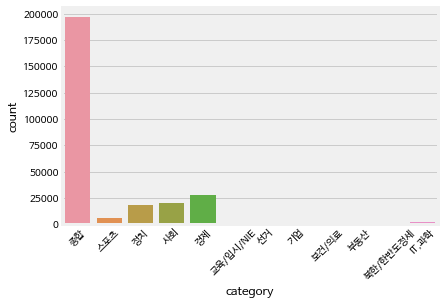

In [19]:
plt.rc('font', family='NanumBarunGothic') 
sns.countplot(x="category", data=news)
sns.set(rc = {'figure.figsize':(8,5)})
plt.xticks(rotation=45)

plt.show()

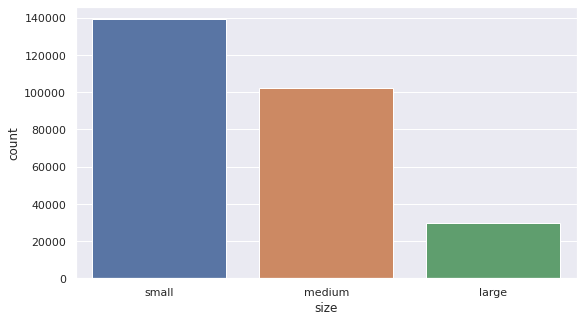

In [20]:
sns.countplot(x="size", data=news)
sns.set(rc = {'figure.figsize':(5,4)})
# plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic') 

plt.show()

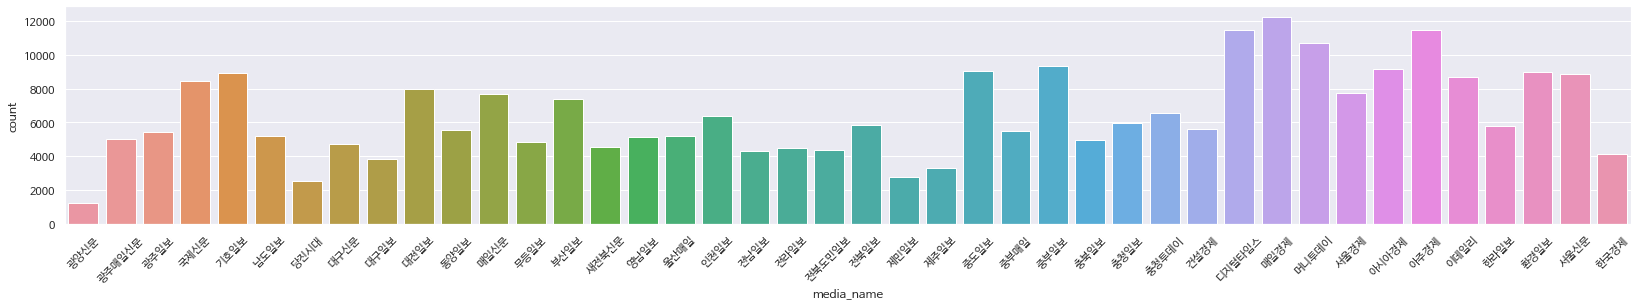

In [21]:
sns.set(rc = {'figure.figsize':(25,4)})
plt.rc('font', family='NanumBarunGothic') 
sns.countplot(x="media_name", data=news)

plt.xticks(rotation=45)

plt.show()

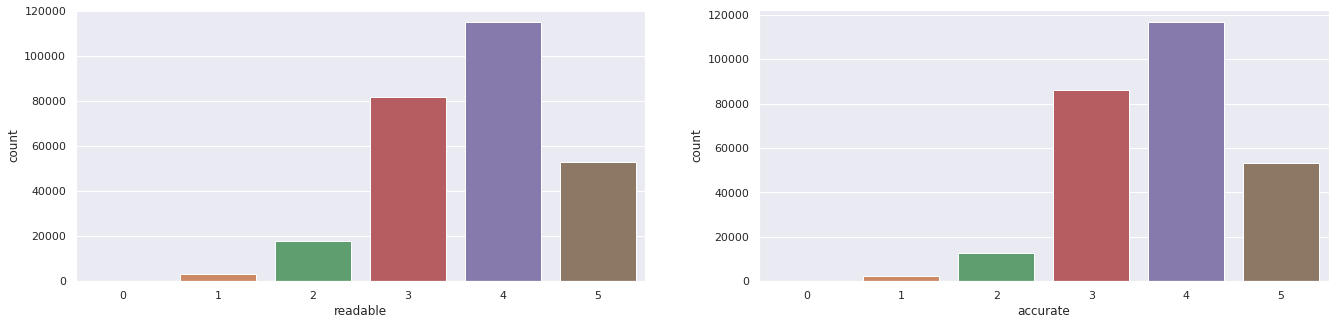

In [22]:
sns.set(rc = {'figure.figsize':(20,5)})

fig, ax = plt.subplots(ncols=2)
sns.countplot(x="readable", data=news, ax=ax[0])
sns.countplot(x="accurate", data=news, ax=ax[1])

# plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic') 

# plt.show()

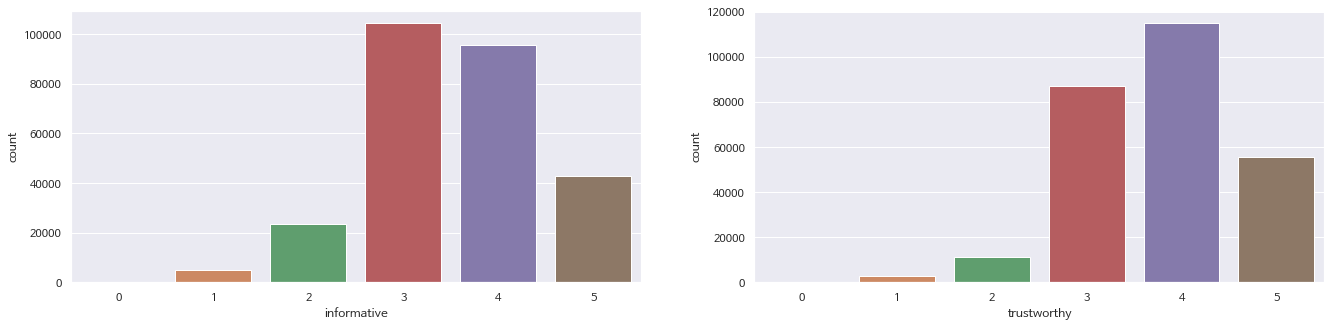

In [23]:
fig, ax = plt.subplots(ncols=2)

sns.countplot(x="informative", data=news,ax=ax[0])
sns.countplot(x="trustworthy", data=news, ax=ax[1])

plt.rc('font', family='NanumBarunGothic') 

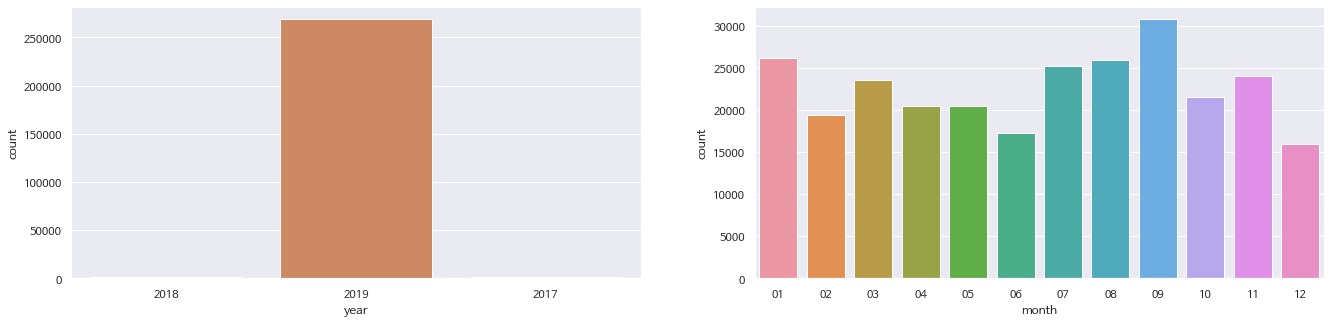

In [24]:
fig, ax = plt.subplots(ncols=2)

sns.countplot(x="year", data=news,ax=ax[0])
sns.countplot(x="month", data=news, ax=ax[1])

sns.set(rc = {'figure.figsize':(20,5)})

plt.rc('font', family='NanumBarunGothic') 

In [25]:
df = news[['category','media_name','title','origin','ext_sum','abs_sum','size','char_count','year','month','date','readable','accurate','informative','trustworthy']]
df.head()

,category,media_name,title,origin,ext_sum,abs_sum,size,char_count,year,month,date,readable,accurate,informative,trustworthy
1,종합,광양신문,"논 타작물 재배, 2월 말까지 신청하세요","[ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n...",[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 ...,small,927,2018,01,05,4,3,3,3
2,종합,광양신문,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,small,764,2018,01,05,4,4,5,4
3,스포츠,광양신문,“새해 정기 받고 올해는 반드시 일내자!”,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,medium,1066,2018,01,05,4,4,4,4
4,정치,광양신문,"농업인 역량 강화, 새해 실용교육 실시","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...",small,746,2018,01,05,4,4,5,4
5,종합,광양신문,타이완 크루즈관광객 4천여명‘전남’온다,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,small,978,2018,01,05,4,4,4,4


In [26]:
print(df[df['size']=='small']['char_count'].astype(int).mean()) #- size small의 평균 char_count : 833
print(df[df['size']=='medium']['char_count'].astype(int).mean()) #- size medium의 평균 char_count : 1204
print(df[df['size']=='large']['char_count'].astype(int).mean()) #- size large의 평균 char_count : 1694

832.5040148372859
1204.2265018739786
1693.9704648430945


In [27]:
df.describe()

,readable,accurate,informative,trustworthy
count,271093.000000,271093.000000,271093.000000,271093.000000
mean,3.722745,3.759994,3.546831,3.770592
std,0.893117,0.849028,0.919150,0.854285
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [28]:
df.isnull().sum()

category       0
media_name     0
title          0
origin         0
ext_sum        0
abs_sum        0
size           0
char_count     0
year           0
month          0
date           0
readable       0
accurate       0
informative    0
trustworthy    0
dtype: int64

## document_quality_scores

<AxesSubplot:ylabel='Density'>

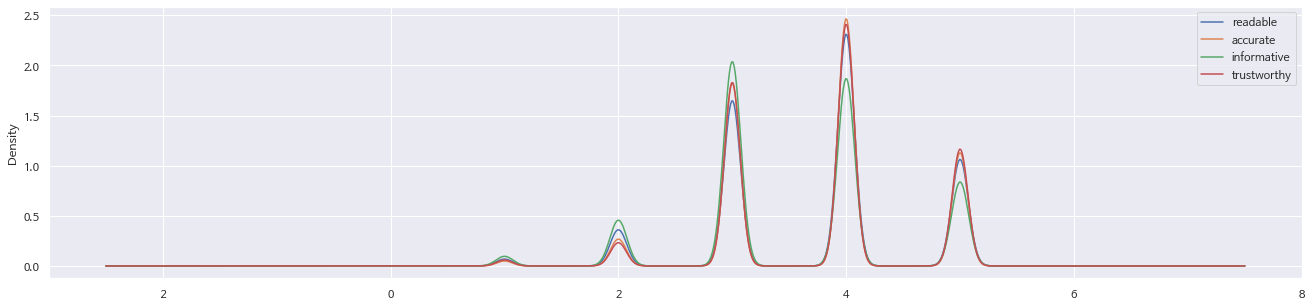

In [29]:
df[['readable','accurate','informative','trustworthy']].plot(kind='kde')

In [30]:
# #- 가독성 4점 이상 (약 16만7천개)
# tmp = df[df['readable'] >= 4].reset_index()
# tmp.shape

# cnt = 0
# for i in range(0,tmp.shape[0],100):
#     cnt += 1
#     print(f"원문:\n{tmp['origin'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
#     if cnt > 5:
#         break

In [31]:
# #- 가독성 1점 (약 3천4백개)
# tmp = df[df['readable'] == 1].reset_index()
# print(tmp.shape)

# cnt = 0
# for i in range(0,tmp.shape[0],100):
#     cnt += 1
#     print(f"원문:\n{tmp['origin'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
#     if cnt > 5:
#         break

In [32]:
#- 모든 스코어 4점 이상 (약 10만4천개)
tmp = df[(df['readable'] >= 4) & (df['accurate'] >= 4) & (df['informative'] >= 4) & (df['trustworthy'] >= 4)].reset_index()
print(tmp.shape)

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

(104355, 16)
원문:
['8억 투입, 고소천사벽화·자산마을에 색채 입혀', '이성훈 sinawi@hanmail.net', '여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다.', '시에 따르면 총 사업비 8억원이 투입된 컬러빌리지 사업은‘낮에는 색채, 밤에는 빛’을 주제로 지난해 초 착공에 들어갔다.', '컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다.', '특히 자산마을 주택 70여 동은 동백꽃 색으로 새 단장을 마쳤다.', '마을 옆을 지나는 해상케이블카에서 내려다보면 동백꽃 한 송이가 피어있는 모습으로 SNS 등을 통해 입소문을 타고 있다.', '고소천사벽화마을 주택 130여 동도 지붕은 동백꽃 색, 벽면은 파스텔 톤 색상으로 변신해 이국적인 분위기를 내고 있다.', '마을 내 옹벽과 비탈면은 패턴벽화와 야간조명이 설치돼 포토존으로 인기를 끌고 있다.', '컬러빌리지 사업은 추진 전반에 마을 주민이 적극 참여했다는 점에서 좋은 평가를 받고 있다.', '시는 사업대상이 사유시설인 만큼 계획단계부터 주민들의 의견을 들었다.', '사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다.', '시 관계자는“컬러빌리지 사업은 주민들의 적극적인 관심과 참여가 만들어낸 값진 성과물”이라며“돌산공원, 해상케이블카, 남산공원, 돌산대교 등에서 빛과 색채로 물들어가는 여수의 낭만을 만끽하시기 바란다”고 말했다.']

추출요약:
['여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다.', '컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다.', '사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다.']

생성요약
['여수시는 컬러빌리

In [33]:
tmp.head()

,index,category,media_name,title,origin,ext_sum,abs_sum,size,char_count,year,month,date,readable,accurate,informative,trustworthy
0,2,종합,광양신문,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,small,764,2018,01,05,4,4,5,4
1,3,스포츠,광양신문,“새해 정기 받고 올해는 반드시 일내자!”,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,medium,1066,2018,01,05,4,4,4,4
2,4,정치,광양신문,"농업인 역량 강화, 새해 실용교육 실시","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...",small,746,2018,01,05,4,4,5,4
3,5,종합,광양신문,타이완 크루즈관광객 4천여명‘전남’온다,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,small,978,2018,01,05,4,4,4,4
4,6,정치,광양신문,"읍면동 주민센터, 일자리 안정자금 접수","[30인 미만 중소기업 등 사업주에 월 13만원 지급, 이성훈 sinawi@hanm...",[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,small,953,2018,01,05,4,4,5,4


In [34]:
#- 모든 score 4 이상인 데이터 
df_filtered = tmp

## size
- 모든 score 4 이상 & size small & char_count 평균 833 : 약 5만 4천개

In [35]:
# #- size small 약 5만 4천 개 
# tmp = df_filtered[df_filtered['size'] == 'small'].reset_index()
# print(tmp.shape)

# cnt = 0
# for i in range(0,tmp.shape[0],100):
#     cnt += 1
#     print(f"원문:\n{tmp['origin'][i]}\n\n글자수:{tmp['char_count'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
#     if cnt > 5:
#         break

In [36]:
# #- size medium ; 약 4만 개
# tmp = df_filtered[df_filtered['size'] == 'medium'].reset_index()
# print(tmp.shape)

# cnt = 0
# for i in range(0,tmp.shape[0],100):
#     cnt += 1
#     print(f"원문:\n{tmp['origin'][i]}\n\n글자수:{tmp['char_count'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
#     if cnt > 5:
#         break

In [37]:
# #- size large ; 약 1만 천개
# tmp = df_filtered[df_filtered['size'] == 'large'].reset_index()
# print(tmp.shape)

# cnt = 0
# for i in range(0,tmp.shape[0],100):
#     cnt += 1
#     print(f"원문:\n{tmp['origin'][i]}\n\n글자수:{tmp['char_count'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}\n\n")
#     if cnt > 5:
#         break

# Mecab()
- https://konlpy.org/ko/latest/install/#ubuntu
- https://bitbucket.org/eunjeon/mecab-ko-dic/src/master/

In [38]:
# #- Install dependencies
# ! Install Java 1.8 or up
# ! sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

In [39]:
# #- Install KoNLPy
# ! python3 -m pip install --upgrade pip
# ! python3 -m pip install konlpy       # Python 3.x

In [40]:
# #- mecab 설치
# ! sudo apt-get install curl git
# ! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)


```python
>>> # MeCab installation needed
>>> from konlpy.tag import Mecab
>>> mecab = Mecab()
>>> print(mecab.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
['영등포구', '청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']
>>> print(mecab.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
['우리', '나라', '무릎', '치료', '정형외과']
>>> print(mecab.pos(u'자연주의 쇼핑몰은 어떤 곳인가?'))
[('자연', 'NNG'), ('주', 'NNG'), ('의', 'JKG'), ('쇼핑몰', 'NNG'), ('은', 'JX'), ('어떤', 'MM'), ('곳', 'NNG'), ('인가', 'VCP+EF'), ('?', 'SF')]
```

In [41]:
pair_data = df_filtered[['ext_sum','abs_sum']]
pair_data.head()

,ext_sum,abs_sum
0,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...
1,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...
2,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화..."
3,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...
4,[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...


In [42]:
from konlpy.tag import Mecab
mecab = Mecab()

In [43]:
 pair_data.shape

(104355, 2)

In [44]:
print(pair_data.abs_sum[0][0])

여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었다.


In [45]:
print(mecab.morphs(pair_data.abs_sum[0][0]))

['여수시', '는', '컬러', '빌리지', '사업', '에', '8', '억', '원', '을', '투입', '하', '여', '‘', '색채', '와', '빛', '’', '도시', '를', '완성', '하', '여', '고소', '천사', '벽화', '마을', '과', '자산', '마을', '은', '알록달록', '색깔', '옷', '을', '입', '었', '고', '사업', '시행', '과', '준공', '과정', '에서', '도', '주민', '들', '의', '참여', '를', '유도', '해', '경관', '사업', '의', '좋', '은', '사례', '를', '만들', '었', '다', '.']


In [46]:
print(mecab.pos(pair_data.abs_sum[0][0]))

[('여수시', 'NNP'), ('는', 'JX'), ('컬러', 'NNG'), ('빌리지', 'NNG'), ('사업', 'NNG'), ('에', 'JKB'), ('8', 'SN'), ('억', 'NR'), ('원', 'NNBC'), ('을', 'JKO'), ('투입', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('‘', 'SY'), ('색채', 'NNG'), ('와', 'JC'), ('빛', 'NNG'), ('’', 'SY'), ('도시', 'NNG'), ('를', 'JKO'), ('완성', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('고소', 'NNG'), ('천사', 'NNG'), ('벽화', 'NNG'), ('마을', 'NNG'), ('과', 'JC'), ('자산', 'NNG'), ('마을', 'NNG'), ('은', 'JX'), ('알록달록', 'MAG'), ('색깔', 'NNG'), ('옷', 'NNG'), ('을', 'JKO'), ('입', 'VV'), ('었', 'EP'), ('고', 'EC'), ('사업', 'NNG'), ('시행', 'NNG'), ('과', 'JC'), ('준공', 'NNG'), ('과정', 'NNG'), ('에서', 'JKB'), ('도', 'JX'), ('주민', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('참여', 'NNG'), ('를', 'JKO'), ('유도', 'NNG'), ('해', 'XSV+EC'), ('경관', 'NNG'), ('사업', 'NNG'), ('의', 'JKG'), ('좋', 'VA'), ('은', 'ETM'), ('사례', 'NNG'), ('를', 'JKO'), ('만들', 'VV'), ('었', 'EP'), ('다', 'EF'), ('.', 'SF')]


- 생성요약문 origin.ver
    - 여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었다.
- 생성요약문 어미 전환.ver
    - 여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었어요. 그리고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었어요.

In [47]:
print(mecab.morphs(u'여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었어요. 그리고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었어요.'))

['여수시', '는', '컬러', '빌리지', '사업', '에', '8', '억', '원', '을', '투입', '하', '여', '‘', '색채', '와', '빛', '’', '도시', '를', '완성', '하', '여', '고소', '천사', '벽화', '마을', '과', '자산', '마을', '은', '알록달록', '색깔', '옷', '을', '입', '었', '어요', '.', '그리고', '사업', '시행', '과', '준공', '과정', '에서', '도', '주민', '들', '의', '참여', '를', '유도', '해', '경관', '사업', '의', '좋', '은', '사례', '를', '만들', '었', '어요', '.']


In [48]:
print(mecab.pos(u'여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었어요. 그리고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었어요.'))

[('여수시', 'NNP'), ('는', 'JX'), ('컬러', 'NNG'), ('빌리지', 'NNG'), ('사업', 'NNG'), ('에', 'JKB'), ('8', 'SN'), ('억', 'NR'), ('원', 'NNBC'), ('을', 'JKO'), ('투입', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('‘', 'SY'), ('색채', 'NNG'), ('와', 'JC'), ('빛', 'NNG'), ('’', 'SY'), ('도시', 'NNG'), ('를', 'JKO'), ('완성', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('고소', 'NNG'), ('천사', 'NNG'), ('벽화', 'NNG'), ('마을', 'NNG'), ('과', 'JC'), ('자산', 'NNG'), ('마을', 'NNG'), ('은', 'JX'), ('알록달록', 'MAG'), ('색깔', 'NNG'), ('옷', 'NNG'), ('을', 'JKO'), ('입', 'VV'), ('었', 'EP'), ('어요', 'EF'), ('.', 'SF'), ('그리고', 'MAJ'), ('사업', 'NNG'), ('시행', 'NNG'), ('과', 'JC'), ('준공', 'NNG'), ('과정', 'NNG'), ('에서', 'JKB'), ('도', 'JX'), ('주민', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('참여', 'NNG'), ('를', 'JKO'), ('유도', 'NNG'), ('해', 'XSV+EC'), ('경관', 'NNG'), ('사업', 'NNG'), ('의', 'JKG'), ('좋', 'VA'), ('은', 'ETM'), ('사례', 'NNG'), ('를', 'JKO'), ('만들', 'VV'), ('었', 'EP'), ('어요', 'EF'), ('.', 'SF')]


- ('고', 'EC') : 연결어미
    - 연결어미(EC)는 접속부사('그리고', 'MAJ') + 종결어미(EF)로 전환
- ('다', 'EF') : 종결어미
    - 종결어미(EF)는 ~요체 EF로 전환
    - ~어요, ~지요, ~다고, ~라고
---
- ('여수시', 'NNP') : 고유명사
- ('는', 'JX') : 보조사
- ('컬러', 'NNG') : 일반명사
- ('에', 'JKB') : 부사격 조사
- ('8', 'SN') : 숫자
- ('억', 'NR') : 수사
- ('원', 'NNBC') : 단위를 나타내는 명사
- ('을', 'JKO') : 목적격 조사
- ('투입', 'NNG') : 일반 명사
- ('하', 'XSV') : 동사 파생 접미사
- ('여', 'EC') : 연결어미
- ('과', 'JC') : 접속 조사
- ('은', 'JX') : 보조사
- ('알록달록', 'MAG') : 일반부사
- ('입', 'VV') : 동사
- ('었', 'EP') : 선어말 어미
- ('.', 'SF') : 마침표, 물음표, 느낌표
- ('그리고', 'MAJ') : 접속부사
- ('들', 'XSN') : 명사 파생 접미사
- ('해', 'XSV+EC') : 형용사 파생 접미사 + 연결 어미
- ('좋', 'VA') : 형용사
- ('은', 'ETM') : 관형형 전성 어미


In [49]:
tmp = mecab.pos(u'여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었어요. 그리고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었어요.')
type(tmp)

list

In [50]:
#- 종결 어미
ef = [i for i in tmp if i[1]=='EF']
ef

[('어요', 'EF'), ('어요', 'EF')]

In [51]:
#- 연결 어미
ec = [i for i in tmp if i[1]=='EC']
ec

[('여', 'EC'), ('여', 'EC')]

In [52]:
#- 일반 명사
nng = [i for i in tmp if i[1]=='NNG']
nng

[('컬러', 'NNG'),
 ('빌리지', 'NNG'),
 ('사업', 'NNG'),
 ('투입', 'NNG'),
 ('색채', 'NNG'),
 ('빛', 'NNG'),
 ('도시', 'NNG'),
 ('완성', 'NNG'),
 ('고소', 'NNG'),
 ('천사', 'NNG'),
 ('벽화', 'NNG'),
 ('마을', 'NNG'),
 ('자산', 'NNG'),
 ('마을', 'NNG'),
 ('색깔', 'NNG'),
 ('옷', 'NNG'),
 ('사업', 'NNG'),
 ('시행', 'NNG'),
 ('준공', 'NNG'),
 ('과정', 'NNG'),
 ('주민', 'NNG'),
 ('참여', 'NNG'),
 ('유도', 'NNG'),
 ('경관', 'NNG'),
 ('사업', 'NNG'),
 ('사례', 'NNG')]

In [53]:
#- 동사
vv = [i for i in tmp if i[1]=='VV']
vv

[('입', 'VV'), ('만들', 'VV')]

In [54]:
#- 형용사
va = [i for i in tmp if i[1]=='VA']
va

[('좋', 'VA')]

In [55]:
for i in range(0,pair_data.shape[0],10):
    
    print(f'{i}번째 생성요약문: {pair_data.abs_sum[i][0]} \
            \n\n형태소 분석{mecab.morphs(pair_data.abs_sum[i][0])} \
            \n\n품사 태깅{mecab.pos(pair_data.abs_sum[i][0])}\n\n')
    if i == 50:
        break

0번째 생성요약문: 여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었고 사업 시행과 준공 과정에서도 주민들의 참여를 유도해 경관사업의 좋은 사례를 만들었다.             

형태소 분석['여수시', '는', '컬러', '빌리지', '사업', '에', '8', '억', '원', '을', '투입', '하', '여', '‘', '색채', '와', '빛', '’', '도시', '를', '완성', '하', '여', '고소', '천사', '벽화', '마을', '과', '자산', '마을', '은', '알록달록', '색깔', '옷', '을', '입', '었', '고', '사업', '시행', '과', '준공', '과정', '에서', '도', '주민', '들', '의', '참여', '를', '유도', '해', '경관', '사업', '의', '좋', '은', '사례', '를', '만들', '었', '다', '.']             

품사 태깅[('여수시', 'NNP'), ('는', 'JX'), ('컬러', 'NNG'), ('빌리지', 'NNG'), ('사업', 'NNG'), ('에', 'JKB'), ('8', 'SN'), ('억', 'NR'), ('원', 'NNBC'), ('을', 'JKO'), ('투입', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('‘', 'SY'), ('색채', 'NNG'), ('와', 'JC'), ('빛', 'NNG'), ('’', 'SY'), ('도시', 'NNG'), ('를', 'JKO'), ('완성', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('고소', 'NNG'), ('천사', 'NNG'), ('벽화', 'NNG'), ('마을', 'NNG'), ('과', 'JC'), ('자산', 'NNG'), ('마을', 'NNG'), ('은', 'JX'), ('알록달록', 'MAG'), ('색깔', 'NNG'), ('옷', '

In [56]:
def morphs_pos(pair_data, i):
    abs_ = pair_data.abs_sum[i][0]
    morphs_ = mecab.morphs(pair_data.abs_sum[i][0])
    tmp = mecab.pos(pair_data.abs_sum[i][0])
    print(f'{i}번째 생성요약문 : {abs_} \
            \n\n형태소 분석 : {morphs_} \
            \n\n품사 태깅 : {tmp}\n\n')

    #- 종결 어미
    ef = [i for i in tmp if 'EF' in i[1]]
    #- 연결 어미
    ec = [i for i in tmp if 'EC' in i[1]]
    #- 일반 명사
    nng = [i for i in tmp if 'NNG' in i[1]]
    #- 동사
    vv = [i for i in tmp if 'VV' in i[1]]
    #- 형용사
    va = [i for i in tmp if 'VA' in i[1]]
    
    print(f'종결어미 : {ef}\n연결어미 : {ec}\n일반명사 : {nng}\n동사 : {vv}\n형용사 : {va}')

In [57]:
morphs_pos(pair_data, 2)

2번째 생성요약문 : 광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작목 중심으로 농업인 실용교육을 실시한다.             

형태소 분석 : ['광양시', '는', '농업', '인', '들', '의', '경쟁력', '을', '높이', '고', ',', '소득', '안정', '을', '위해', '매실', '·', '감', '·', '참', '다래', '등', '지역', '특화', '작목', '중심', '으로', '농업', '인', '실용', '교육', '을', '실시', '한다', '.']             

품사 태깅 : [('광양시', 'NNP'), ('는', 'JX'), ('농업', 'NNG'), ('인', 'XSN'), ('들', 'XSN'), ('의', 'JKG'), ('경쟁력', 'NNG'), ('을', 'JKO'), ('높이', 'VV'), ('고', 'EC'), (',', 'SC'), ('소득', 'NNG'), ('안정', 'NNG'), ('을', 'JKO'), ('위해', 'VV+EC'), ('매실', 'NNG'), ('·', 'SC'), ('감', 'NNG'), ('·', 'SC'), ('참', 'IC'), ('다래', 'NNP'), ('등', 'NNB'), ('지역', 'NNG'), ('특화', 'NNG'), ('작목', 'NNG'), ('중심', 'NNG'), ('으로', 'JKB'), ('농업', 'NNG'), ('인', 'VCP+ETM'), ('실용', 'NNG'), ('교육', 'NNG'), ('을', 'JKO'), ('실시', 'NNG'), ('한다', 'XSV+EF'), ('.', 'SF')]


종결어미 : [('한다', 'XSV+EF')]
연결어미 : [('고', 'EC'), ('위해', 'VV+EC')]
일반명사 : [('농업', 'NNG'), ('경쟁력', 'NNG'), ('소득', 'NNG'), ('안정', 'NNG'), ('매실', 'NNG'), ('감', 'NNG'), 

In [58]:
morphs_pos(pair_data, 3)

3번째 생성요약문 : 올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항해 전남의 관광지를 방문할 예정이다.             

형태소 분석 : ['올해', '4', '월', '과', '6', '월', '두', '차례', '에', '걸쳐', '타이완', '의', '크루즈', '관광객', '4000', '여', '명', '이', '여수', '에', '입항', '해', '전남', '의', '관광지', '를', '방문', '할', '예정', '이', '다', '.']             

품사 태깅 : [('올해', 'NNG'), ('4', 'SN'), ('월', 'NNBC'), ('과', 'JC'), ('6', 'SN'), ('월', 'NNBC'), ('두', 'MM'), ('차례', 'NNG'), ('에', 'JKB'), ('걸쳐', 'VV+EC'), ('타이완', 'NNP'), ('의', 'JKG'), ('크루즈', 'NNP'), ('관광객', 'NNG'), ('4000', 'SN'), ('여', 'XSN'), ('명', 'NNBC'), ('이', 'JKS'), ('여수', 'NNP'), ('에', 'JKB'), ('입항', 'NNG'), ('해', 'XSV+EC'), ('전남', 'NNP'), ('의', 'JKG'), ('관광지', 'NNG'), ('를', 'JKO'), ('방문', 'NNG'), ('할', 'XSV+ETM'), ('예정', 'NNG'), ('이', 'VCP'), ('다', 'EF'), ('.', 'SF')]


종결어미 : [('다', 'EF')]
연결어미 : [('걸쳐', 'VV+EC'), ('해', 'XSV+EC')]
일반명사 : [('올해', 'NNG'), ('차례', 'NNG'), ('관광객', 'NNG'), ('입항', 'NNG'), ('관광지', 'NNG'), ('방문', 'NNG'), ('예정', 'NNG')]
동사 : [('걸쳐', 'VV+EC')]
형용사 : []


In [59]:
morphs_pos(pair_data, 10000)

10000번째 생성요약문 : 인천시 강화군은 축산농가의 예상치 못한 각종 재해와 질병으로 인한 피해를 최소화하고 농가의 안정화를 보장하기 위하여 산출보험료의 80%를 군에서 지원하고, 축산농가는 20%만 부담하는 '가축재해보험 가입 지원사업'을 추진하고 있다고 19일 밝혔다.              

형태소 분석 : ['인천시', '강화군', '은', '축산', '농가', '의', '예상', '치', '못한', '각종', '재해', '와', '질병', '으로', '인한', '피해', '를', '최소', '화', '하', '고', '농가', '의', '안정', '화', '를', '보장', '하', '기', '위하', '여', '산출', '보험료', '의', '80', '%', '를', '군', '에서', '지원', '하', '고', ',', '축산', '농가', '는', '20', '%', '만', '부담', '하', '는', "'", '가', '축재', '해', '보험', '가입', '지원', '사업', "'", '을', '추진', '하', '고', '있', '다고', '19', '일', '밝혔', '다', '.']             

품사 태깅 : [('인천시', 'NNP'), ('강화군', 'NNG'), ('은', 'JX'), ('축산', 'NNG'), ('농가', 'NNG'), ('의', 'JKG'), ('예상', 'NNG'), ('치', 'XSV+EC'), ('못한', 'VX+ETM'), ('각종', 'NNG'), ('재해', 'NNG'), ('와', 'JC'), ('질병', 'NNG'), ('으로', 'JKB'), ('인한', 'VV+ETM'), ('피해', 'NNG'), ('를', 'JKO'), ('최소', 'NNG'), ('화', 'XSN'), ('하', 'XSV'), ('고', 'EC'), ('농가', 'NNG'), ('의', 'JKG'), ('안정', 'NNG'), ('화', 'XSN'), ('를', 'JKO'), ('보장', 'NNG'

- 모든 score 4점 이상 & 사이즈  
- 특징 생성
- 종결 어미, 연결 어미, 종결 어미 개수, 연결 어미 개수, 글자 수

In [60]:
def morphs(x): return mecab.morphs(x)
def pos(x): return mecab.pos(x)
def pos_(x): return [i[1] for i in x]
def word_phase(x): return x.split()

def pos_NNG(x): return [i[0] for i in x if 'NNG' in i[1]] 
def pos_NNP(x): return [i[0] for i in x if 'NNP' in i[1]] 
def pos_EC(x): return [i[0] for i in x if 'EC' in i[1]]
def pos_EF(x): return [i[0] for i in x if 'EF' in i[1]]
def pos_SN(x): return [i[0] for i in x if 'SN' in i[1]]
def pos_MAG(x): return [i[0] for i in x if 'MAG' in i[1]]
def pos_MAJ(x): return [i[0] for i in x if 'MAJ' in i[1]]

def pos_num_NNG(x): return len([i for i in x if 'NNG' in i[1]]) #- 일반명사
def pos_num_NNP(x): return len([i for i in x if 'NNP' in i[1]]) #- 고유명사
def pos_num_EC(x): return len([i for i in x if 'EC' in i[1]]) #- 연결어미
def pos_num_EF(x): return len([i for i in x if 'EF' in i[1]]) #- 종결어미
def pos_num_SN(x): return len([i for i in x if 'SN' in i[1]]) #- 숫자
def pos_num_MAG(x): return len([i for i in x if 'MAG' in i[1]]) #- 일반부사
def pos_num_MAJ(x): return len([i for i in x if 'MAJ' in i[1]]) #- 접속부사


# def morph_to_pos(morphs, pos_): return dict(zip(morphs, pos_))
def morph_to_pos(x): return dict(x)
def morphs_num(x): return len(x) 

In [61]:
%%time

pair_data['pos'] = pair_data['abs_sum'].map(lambda x : pos(x[0]))
pair_data['morphs'] = pair_data['abs_sum'].map(lambda x : morphs(x[0]))

pair_data['pos_'] = pair_data['pos'].map(lambda x : pos_(x))
pair_data['word_phase'] = pair_data['abs_sum'].map(lambda x : word_phase(x[0]))
# pair_data['morph_to_pos'] = pair_data.apply(lambda x: morph_to_pos(x['morphs'],x['pos_']), axis=1)
pair_data['morph_to_pos'] = pair_data['pos'].map(lambda x:morph_to_pos(x))

pair_data['pos_NNP'] = pair_data['pos'].map(lambda x : pos_NNP(x))
pair_data['pos_NNG'] = pair_data['pos'].map(lambda x : pos_NNG(x))
pair_data['pos_EC'] = pair_data['pos'].map(lambda x : pos_EC(x))
pair_data['pos_EF'] = pair_data['pos'].map(lambda x : pos_EF(x))
pair_data['pos_SN'] = pair_data['pos'].map(lambda x : pos_SN(x))
pair_data['pos_MAG'] = pair_data['pos'].map(lambda x : pos_MAG(x))
pair_data['pos_MAJ'] = pair_data['pos'].map(lambda x : pos_MAJ(x))


pair_data['pos_num_NNP'] = pair_data['pos'].map(lambda x : pos_num_NNP(x))
pair_data['pos_num_NNG'] = pair_data['pos'].map(lambda x : pos_num_NNG(x))
pair_data['pos_num_EC'] = pair_data['pos'].map(lambda x : pos_num_EC(x))
pair_data['pos_num_EF'] = pair_data['pos'].map(lambda x : pos_num_EF(x))
pair_data['pos_num_SN'] = pair_data['pos'].map(lambda x : pos_num_SN(x))
pair_data['pos_num_MAG'] = pair_data['pos'].map(lambda x : pos_num_MAG(x))
pair_data['pos_num_MAJ'] = pair_data['pos'].map(lambda x : pos_num_MAJ(x))

pair_data['morphs_num'] = pair_data['morphs'].map(lambda x : morphs_num(x))

pair_data.head()

CPU times: user 1min 13s, sys: 1.58 s, total: 1min 15s
Wall time: 1min 15s


,ext_sum,abs_sum,pos,morphs,pos_,word_phase,morph_to_pos,pos_NNP,pos_NNG,pos_EC,...,pos_MAG,pos_MAJ,pos_num_NNP,pos_num_NNG,pos_num_EC,pos_num_EF,pos_num_SN,pos_num_MAG,pos_num_MAJ,morphs_num
0,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,"[(여수시, NNP), (는, JX), (컬러, NNG), (빌리지, NNG), (...","[여수시, 는, 컬러, 빌리지, 사업, 에, 8, 억, 원, 을, 투입, 하, 여,...","[NNP, JX, NNG, NNG, NNG, JKB, SN, NR, NNBC, JK...","[여수시는, 컬러빌리지, 사업에, 8억원을, 투입하여, ‘색채와, 빛’, 도시를, ...","{'여수시': 'NNP', '는': 'JX', '컬러': 'NNG', '빌리지': ...",[여수시],"[컬러, 빌리지, 사업, 투입, 색채, 빛, 도시, 완성, 고소, 천사, 벽화, 마...","[여, 여, 고, 해]",...,[알록달록],[],1,26,4,1,2,1,0,63
1,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,"[(전남, NNP), (드래곤즈, NNP), (임직원, NNG), (과, JC), ...","[전남, 드래곤즈, 임직원, 과, 선수단, 이, 4, 일, 구봉산, 정상, 에, 올...","[NNP, NNP, NNG, JC, NNG, JKS, SN, NNBC, NNP, N...","[전남드래곤즈, 임직원과, 선수단이, 4일, 구봉산, 정상에, 올라, 일출을, 보며...","{'전남': 'NNP', '드래곤즈': 'NNP', '임직원': 'NNG', '과'...","[전남, 드래곤즈, 구봉산]","[임직원, 선수단, 정상, 일출, 구단, 목표, 달성, 새해, 각오]","[올라, 며]",...,[],[],3,9,2,1,2,0,0,29
2,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","[(광양시, NNP), (는, JX), (농업, NNG), (인, XSN), (들,...","[광양시, 는, 농업, 인, 들, 의, 경쟁력, 을, 높이, 고, ,, 소득, 안정...","[NNP, JX, NNG, XSN, XSN, JKG, NNG, JKO, VV, EC...","[광양시는, 농업인들의, 경쟁력을, 높이고,, 소득안정을, 위해, 매실·감·참다래,...","{'광양시': 'NNP', '는': 'JX', '농업': 'NNG', '인': 'V...","[광양시, 다래]","[농업, 경쟁력, 소득, 안정, 매실, 감, 지역, 특화, 작목, 중심, 농업, 실...","[고, 위해]",...,[],[],2,14,2,1,2,0,0,35
3,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,"[(올해, NNG), (4, SN), (월, NNBC), (과, JC), (6, S...","[올해, 4, 월, 과, 6, 월, 두, 차례, 에, 걸쳐, 타이완, 의, 크루즈,...","[NNG, SN, NNBC, JC, SN, NNBC, MM, NNG, JKB, VV...","[올해, 4월과, 6월, 두, 차례에, 걸쳐, 타이완의, 크루즈, 관광객, 4000...","{'올해': 'NNG', '4': 'SN', '월': 'NNBC', '과': 'JC...","[타이완, 크루즈, 여수, 전남]","[올해, 차례, 관광객, 입항, 관광지, 방문, 예정]","[걸쳐, 해]",...,[],[],4,7,2,1,4,0,0,32
4,[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,"[(광양시, NNP), (는, JX), (30, SN), (인, NNG), (미만,...","[광양시, 는, 30, 인, 미만, 중소기업, 등, 사업주, 에, 1, 인, 당, ...","[NNP, JX, SN, NNG, NNG, NNG, NNB, NNG, JKB, SN...","[광양시는, 30인, 미만, 중소기업, 등, 사업주에, 1인당, 월, 13만원씩, ...","{'광양시': 'NNP', '는': 'ETM', '30': 'SN', '인': 'N...",[광양시],"[인, 미만, 중소기업, 사업주, 인, 월, 지급, 일자리, 안정, 자금, 신청, ...","[면, 통해]",...,[],[],1,15,2,1,6,0,0,38


In [62]:
def pos_SF(x): return [i[0] for i in x if 'SF' in i[1]]
def pos_num_SF(x): return len([i for i in x if 'SF' in i[1]]) 
pair_data['pos_SF'] = pair_data['pos'].map(lambda x : pos_SF(x))
pair_data['pos_num_SF'] = pair_data['pos'].map(lambda x : pos_num_SF(x))
pair_data['pos_num_SF'].describe()

count    104355.000000
mean          0.999358
std           0.173656
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: pos_num_SF, dtype: float64

In [63]:
#- 생성요약 문장 당 '일반명사 개수' 통계 분포

pair_data['pos_num_NNG'].describe()

count    104355.000000
mean         22.915711
std           7.786412
min           0.000000
25%          17.000000
50%          22.000000
75%          28.000000
max         112.000000
Name: pos_num_NNG, dtype: float64

In [64]:
#- 생성요약 문장 당 '고유명사 개수' 통계 분포

pair_data['pos_num_NNP'].describe()

count    104355.000000
mean          2.864788
std           2.307283
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          25.000000
Name: pos_num_NNP, dtype: float64

In [65]:
#- 생성요약 문장 당 '숫자 개수' 통계 분포

pair_data['pos_num_SN'].describe()

count    104355.000000
mean          3.746692
std           2.597808
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          34.000000
Name: pos_num_SN, dtype: float64

In [66]:
#- 생성요약 문장 당 '연결어미 개수' 통계 분포

pair_data['pos_num_EC'].describe()

count    104355.000000
mean          3.534100
std           2.131551
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          29.000000
Name: pos_num_EC, dtype: float64

In [67]:
#- 생성요약 문장 당 '종결어미 개수' 통계 분포

pair_data['pos_num_EF'].describe()

count    104355.000000
mean          1.011806
std           0.216592
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: pos_num_EF, dtype: float64

In [68]:
#- 생성요약 문장 당 '연결부사 개수' 통계 분포

pair_data['pos_num_MAJ'].describe()

count    104355.000000
mean          0.170428
std           0.435985
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: pos_num_MAJ, dtype: float64

In [69]:
#- 생성요약 문장 당 '단어(형태소 분석)' 통계 분포

pair_data['morphs_num'].describe()

count    104355.000000
mean         62.175947
std          17.076692
min           0.000000
25%          50.000000
50%          60.000000
75%          73.000000
max         297.000000
Name: morphs_num, dtype: float64

## 형태소 개수 (morphs_num)
- mean 은 62개
- 75% 는 73개 에 속함
- max 는 297

In [70]:
list(pair_data[pair_data['morphs_num'] == 297].abs_sum)

[['지난 20일 일본 도쿄에서 개막된 2019 럭비 월드컵에서 주최측은 물론 외국 관중들도 욱일기를 응원에 사용하고 있는 것에 대해 서경덕 교수는 이를 방관한 일본과 응원을 막지 않은 주최국 일본이 더 큰 문제라고 지적했다. \n* 제시된 문장은 누가 홍보 부족을 지적했는지가 나와있질 않습니다. 가이드라인에 나와있는 6하원칙 중 누가 라는 부분이 삭제 되는 것인데요... 홍보부족이라는 부분도 지적내용에 들어가 있질 않고요...\n=>기사 어디에도 제목에 있는 "홍보 절실"이란 표현은 없지만 기자가 "서양인들은 일본 욱일기가 독일 하켄크로이츠와 같은 전범기임을 잘 모르기에 사용했으리라 추정된다."에서 홍보를 통해 정확한 사실을 알려야겠다는 취지로 달아 놓은 것으로 생각됩니다. 6하 원칙을 따지면 주어는 "성신여자대학교 교양학부 서경덕 교수"가 되어야 하는데 기사가 "외국인도 전범기 사용"에 초점이 맞춰져 있으므로 "홍보"라는 문구를 생각해서  아래와 같이 수정 요약 문구를 제시해 봅니다.\n=> 20일 2019 럭비 월드컵이 개막되었지만 주최 측은 물론이고 외국 관중들도 전범기인 욱일기를 응원에 사용하고 있어 이를 방관하고 응원을 막지 않은 주최국 일본에 문제가 있음이 지적되었다.']]

In [71]:
def quantile(col):
    Q25=pair_data[col].quantile(.25)
    Q50=pair_data[col].quantile(.50)
    Q75=pair_data[col].quantile(.75)
    Q95=pair_data[col].quantile(.95)
    bins = [0,Q25,Q50,Q75,Q95]
    labels = ['Q25','Q50','Q75','Q95']
    return bins, labels

In [72]:
bins, labels = quantile('morphs_num')  
pair_data['pos_cat_morphs'] = pd.cut(x=pair_data['morphs_num'],bins=bins,labels=labels)

pair_data['pos_cat_morphs'].describe()

count     99337
unique        4
top         Q75
freq      27705
Name: pos_cat_morphs, dtype: object

In [73]:
#- NaN은 연결어미EC 개수가 0인 경우
bins, labels = quantile('pos_num_EC')  
pair_data['pos_cat_EC'] = pd.cut(x=pair_data['pos_num_EC'],bins=bins,labels=labels)
pair_data['pos_cat_EC'].describe()

count     95867
unique        4
top         Q25
freq      33202
Name: pos_cat_EC, dtype: object

In [74]:
tmp = pair_data.groupby(['pos_num_EF','pos_cat_morphs','pos_cat_EC'])['morphs_num'].mean()
tmp.unstack()
#- 종결어미 개수가 많아질수록 연결어미 개수 0일 가능성이 높아짐

pos_cat_EC                       Q25        Q50        Q75        Q95
pos_num_EF pos_cat_morphs                                            
0          Q25             40.189349  43.309735  44.798507  46.045455
           Q50             54.740260  55.629310  55.466667  55.692308
           Q75             65.739130  66.272727  66.468254  66.938272
           Q95             81.125000  80.750000  80.476190  80.625000
1          Q25             41.775247  43.862815  44.902622  46.038076
           Q50             55.300724  55.519659  55.877288  56.255198
           Q75             66.036204  66.267308  66.668286  67.150394
           Q95             80.108220  80.436155  81.153383  81.911653
2          Q25             43.214286  45.551020  45.580000  46.625000
           Q50             55.457286  55.189189  56.429577  57.000000
           Q75             66.327869  66.732394  66.780269  67.817073
           Q95             79.633333  81.530612  81.685000  82.482270
3          Q25             44.666667  47.000000  46.000000        NaN
           Q50             57.857143  55.875000  57.666667  51.000000
           Q75             64.571429  65.692308  66.900000  65.833333
           Q95             81.636364  84.800000  80.562500  81.571429
4          Q25                   NaN        NaN        NaN        NaN
           Q50                   NaN  57.000000        NaN        NaN
           Q75             69.000000        NaN        NaN  71.000000
           Q95                   NaN  86.000000        NaN  82.666667
5          Q25                   NaN        NaN        NaN        NaN
           Q50                   NaN        NaN        NaN        NaN
           Q75                   NaN        NaN        NaN        NaN
           Q95                   NaN        NaN        NaN        NaN
6          Q25                   NaN        NaN        NaN        NaN
           Q50                   NaN        NaN        NaN        NaN
           Q75                   NaN        NaN        NaN        NaN
           Q95                   NaN        NaN        NaN        NaN
8          Q25                   NaN        NaN        NaN        NaN
           Q50                   NaN        NaN        NaN        NaN
           Q75                   NaN        NaN        NaN        NaN
           Q95                   NaN        NaN        NaN        NaN
10         Q25                   NaN        NaN        NaN        NaN
           Q50                   NaN        NaN        NaN        NaN
           Q75                   NaN        NaN        NaN        NaN
           Q95                   NaN        NaN        NaN        NaN

In [75]:
#- 문장 내 연결어미의 개수에 따른 평균 문장 길이(형태소 개수)
pair_data['morphs_num'].groupby(pair_data['pos_num_EC']).mean()

pos_num_EC
0      45.651410
1      50.981128
2      55.569841
3      59.939328
4      64.534833
5      68.824720
6      72.906055
7      77.099636
8      80.621294
9      84.797458
10     88.296970
11     92.598820
12     98.708791
13    101.289157
14    108.488889
15    123.681818
16    125.000000
17    113.800000
18    136.600000
19    165.000000
20    105.000000
21    108.000000
25    174.000000
29    297.000000
Name: morphs_num, dtype: float64

In [76]:
#- 문장 내 종결어미의 개수에 따른 평균 문장 길이(형태소 개수)
pair_data['morphs_num'].groupby(pair_data['pos_num_EF']).mean()

pos_num_EF
0      61.060233
1      62.002115
2      68.693119
3      78.485030
4      89.846154
5     139.000000
6      95.000000
8     297.000000
10    236.000000
Name: morphs_num, dtype: float64

In [77]:
# from collections import Counter

# def detect_outliers(df, n, features):
#     outlier_indices = [] 
#     for col in features:
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3-Q1
        
#         outlier_step = 1.5 * IQR
        
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
#         outlier_indices.extend(outlier_list_col)
#         print(outlier_list_col)
#     outlier_indices = Counter(outlier_indices)
#     multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
#     return multiple_outliers

# Outliers_to_drop = detect_outliers(pair_data, 2, ['pos_num_EF','pos_num_EC','morphs_num'])
# pair_data.loc[Outliers_to_drop]        


In [78]:
#- 종결어미가 10개인 경우. 이상치
list(pair_data[pair_data['pos_num_EF']==10]['abs_sum'])

[['서울경제] \'진심이 닿다\' 이동욱-유인나의 달콤하고 야릇한 소파 키스로 안방극장은 후끈 달아올랐고, 두 사람의 \'숨멎 로맨스\'가 시청자들의 심장을 더욱 요동치게 했다. "우리 지금 잡은 이 손. 다신 놓지 않기로 약속해요"라는 오진심의 말에 권정록은 "절대 놓지 않겠습니다" 라며 두 손을 맞잡고 다짐했다. \n\n권정록은 오진심이 출연하는 드라마에서 남자주인공의 케미가 \'키스 장인\'이라는 남자주인공의 타이틀에 신경이 쓰여 키스신 촬영 당일 현장에 찾아간다. 화기애애해 보이는 오진심과 남자주인공의 모습을 보고 질투심을 폭발한다. \n\n집에 돌아온 오진심은 혹시나 권정록이 오해했을까 키스신은 연기한 것뿐이라며 해명하기 시작했다. 이를 듣던 권정록은 "그럼 척이 아니라 진짜는 이렇게 합니까?"라며 오진심을 부드럽게 끌어당겨 키스한 데 이어, 그를 조심스레 소파에 눕힌 뒤 다시 한번 진하고 뜨겁게 키스를 하는 모습으로 숨멎을 유발했다.']]

In [79]:
#- 종결어미가 연결어미로 분류된 경우. 1500개 
len(list(pair_data[pair_data['pos_num_EF']==0]['abs_sum']))
# list(pair_data[pair_data['pos_num_EF']==0]['pos'])

1544

<AxesSubplot:>

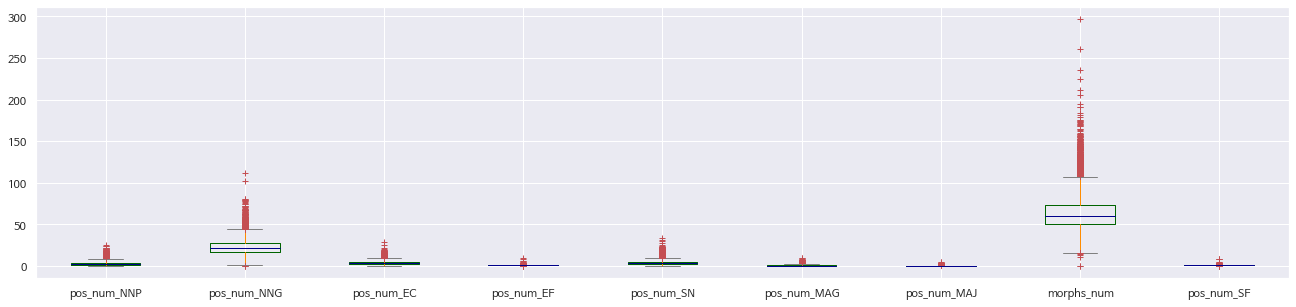

In [80]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
# pair_data.plot.box(color=color, sym='r+')
pair_data.boxplot(color=color, sym='r+')

- 약 9만개
- 문장길이(형태소 개수) < 90 이고 종결어미의 개수는 1개 이하
- 연결어미의 개수는 7개 이하 이고 숫자의 개수는 9개 이하 
- 위 기준은 quantile 95

In [81]:
pair_data['morphs_num'].describe()

count    104355.000000
mean         62.175947
std          17.076692
min           0.000000
25%          50.000000
50%          60.000000
75%          73.000000
max         297.000000
Name: morphs_num, dtype: float64

In [ ]:
#- 누락된 데이터 제거 
pair_data = pair_data[pair_data['morphs_num'] !=0]

In [86]:
pair_data['last_pos'] = pair_data['pos_'].map(lambda x : x[-1])

In [87]:
pair_data['last_pos'].value_counts()

SF              102949
EC                1109
XSV+EC             154
VV+EC               59
SC                  24
VX+EC               18
SY                   9
VV+EF                7
VCP+EC               6
NNG                  4
SSC                  3
UNKNOWN              2
MAG                  2
SL                   1
XSV+EC+VX+EC         1
XSV+EP               1
XSN                  1
SN                   1
XSV+ETM              1
EP+EF                1
Name: last_pos, dtype: int64

In [88]:
pair_data = pair_data[pair_data['last_pos'] == 'SF']
pair_data['last_pos'].value_counts()

SF    102949
Name: last_pos, dtype: int64

In [89]:
pair_data_ = pair_data[(pair_data['morphs_num']<90) & (pair_data['pos_num_EF'] == 1) & (pair_data['pos_num_EC']<= 7) & (pair_data['pos_num_SN']<= 9)]
print(pair_data_.shape) #- 8만 8천개

(88497, 27)


In [90]:
pair_data['sec_last_pos'] = pair_data['pos_'].map(lambda x : x[-2])

In [143]:
pair_data['sec_last_morphs'] = pair_data['morphs'].map(lambda x : x[-2])

In [91]:
pair_data['sec_last_pos'].value_counts()

EF              86862
XSV+EF           9289
VV+EF            4462
VX+EF            1388
VCP+EF            404
VV+EC+VX+EF       204
VV+EC             188
SY                 35
SF                 35
XSA+EC+VX+EF       23
UNKNOWN            11
XSV+EC+VX+EF        9
NNB+VCP+EF          6
NNG                 5
MAG                 4
VX+EC+VX+EF         3
XSA+EC+VV+EF        3
VX+EP+EF            3
SL                  2
XSA+EF              2
EC+EF               2
SN                  1
VV+EC+VV+EF         1
EC+VX+EF            1
VV+EC+EF            1
JKB                 1
VV+EC+VX            1
NA+EF               1
XSV+ETN             1
SC                  1
Name: sec_last_pos, dtype: int64

In [107]:
#- EF + SF 로 맞추기 
pair_data['have_EF'] = pair_data['sec_last_pos'].map(lambda x : 'EF' in x)
pair_data = pair_data[pair_data['have_EF']]
pair_data['have_EF'].describe()

count     102664
unique         1
top         True
freq      102664
Name: have_EF, dtype: object

In [121]:
pair_data['sec_last_pos'].value_counts()

EF              86862
XSV+EF           9289
VV+EF            4462
VX+EF            1388
VCP+EF            404
VV+EC+VX+EF       204
XSA+EC+VX+EF       23
XSV+EC+VX+EF        9
NNB+VCP+EF          6
VX+EC+VX+EF         3
XSA+EC+VV+EF        3
VX+EP+EF            3
EC+EF               2
XSA+EF              2
NA+EF               1
VV+EC+EF            1
VV+EC+VV+EF         1
EC+VX+EF            1
Name: sec_last_pos, dtype: int64

In [110]:
pair_data['pos_'][10][-3]

'NNG'

In [131]:
def have_irregular(x): return (x == 'VV+EF')| (x == 'VX+EF')
pair_data['have_irregular'] = pair_data['sec_last_pos'].map(lambda x : have_irregular(x))

In [133]:
pair_data['have_irregular'].describe()

count     102664
unique         2
top        False
freq       96814
Name: have_irregular, dtype: object

In [132]:
pair_data['have_irregular'].value_counts()

False    96814
True      5850
Name: have_irregular, dtype: int64

In [146]:
pair_data[pair_data['have_irregular']][['sec_last_pos', 'sec_last_morphs']].groupby('sec_last_pos').count()

,sec_last_morphs
sec_last_pos,
VV+EF,4462
VX+EF,1388


In [149]:
pair_data[pair_data['have_irregular']]['sec_last_morphs'].value_counts()

한다       1445
보인다      1167
된다       1106
열린다       292
나선다       235
         ... 
난다          1
없앤다         1
들여다본다       1
뜬다          1
취한다         1
Name: sec_last_morphs, Length: 194, dtype: int64

In [153]:
pair_data[pair_data['sec_last_pos']=='VX+EF']['sec_last_morphs'].value_counts().shape

(10,)

- 불규칙 어미 VV+EF는 4462개(190개 단어), VX+EF는 1388개(10개 단어)
- 불규칙 단어의 set은 194개 (VV+EF 는 190개 , VX+EF는 10개)

In [155]:
regular_data = pair_data[pair_data['have_irregular'] == False]

In [157]:
regular_data.describe()

,pos_num_NNP,pos_num_NNG,pos_num_EC,pos_num_EF,pos_num_SN,pos_num_MAG,pos_num_MAJ,morphs_num,pos_num_SF
count,96814.000000,96814.000000,96814.000000,96814.000000,96814.000000,96814.000000,96814.000000,96814.000000,96814.000000
mean,2.867591,22.955967,3.516816,1.026814,3.742031,0.508687,0.170667,62.224017,1.012054
std,2.295754,7.773357,2.126110,0.178781,2.589603,0.779690,0.435873,17.039172,0.129634
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,1.000000,17.000000,2.000000,1.000000,2.000000,0.000000,0.000000,50.000000,1.000000
50%,2.000000,22.000000,3.000000,1.000000,3.000000,0.000000,0.000000,61.000000,1.000000
75%,4.000000,28.000000,5.000000,1.000000,5.000000,1.000000,0.000000,73.000000,1.000000
max,24.000000,112.000000,29.000000,10.000000,34.000000,10.000000,5.000000,297.000000,8.000000


In [196]:
a = '고마웠어요'
a[-2:]

'어요'

In [199]:
pair_data_.head()

,ext_sum,abs_sum,pos,morphs,pos_,word_phase,morph_to_pos,pos_NNP,pos_NNG,pos_EC,...,pos_num_SF,pos_cat_morphs,pos_cat_EC,last_pos,sec_last_pos,have_EF,irregular,have_irregular,sec_last_morphs,converted_morphs
0,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,"[(여수시, NNP), (는, JX), (컬러, NNG), (빌리지, NNG), (...","[여수시, 는, 컬러, 빌리지, 사업, 에, 8, 억, 원, 을, 투입, 하, 여,...","[NNP, JX, NNG, NNG, NNG, JKB, SN, NR, NNBC, JK...","[여수시는, 컬러빌리지, 사업에, 8억원을, 투입하여, ‘색채와, 빛’, 도시를, ...","{'여수시': 'NNP', '는': 'JX', '컬러': 'NNG', '빌리지': ...",[여수시],"[컬러, 빌리지, 사업, 투입, 색채, 빛, 도시, 완성, 고소, 천사, 벽화, 마...","[여, 여, 고, 해]",...,1,Q75,Q75,SF,EF,True,False,False,다,"[여수시, 는, 컬러, 빌리지, 사업, 에, 8, 억, 원, 을, 투입, 하, 여,..."
1,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,"[(전남, NNP), (드래곤즈, NNP), (임직원, NNG), (과, JC), ...","[전남, 드래곤즈, 임직원, 과, 선수단, 이, 4, 일, 구봉산, 정상, 에, 올...","[NNP, NNP, NNG, JC, NNG, JKS, SN, NNBC, NNP, N...","[전남드래곤즈, 임직원과, 선수단이, 4일, 구봉산, 정상에, 올라, 일출을, 보며...","{'전남': 'NNP', '드래곤즈': 'NNP', '임직원': 'NNG', '과'...","[전남, 드래곤즈, 구봉산]","[임직원, 선수단, 정상, 일출, 구단, 목표, 달성, 새해, 각오]","[올라, 며]",...,1,Q25,Q25,SF,EF,True,False,False,다,"[전남, 드래곤즈, 임직원, 과, 선수단, 이, 4, 일, 구봉산, 정상, 에, 올..."
2,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","[(광양시, NNP), (는, JX), (농업, NNG), (인, XSN), (들,...","[광양시, 는, 농업, 인, 들, 의, 경쟁력, 을, 높이, 고, ,, 소득, 안정...","[NNP, JX, NNG, XSN, XSN, JKG, NNG, JKO, VV, EC...","[광양시는, 농업인들의, 경쟁력을, 높이고,, 소득안정을, 위해, 매실·감·참다래,...","{'광양시': 'NNP', '는': 'JX', '농업': 'NNG', '인': 'V...","[광양시, 다래]","[농업, 경쟁력, 소득, 안정, 매실, 감, 지역, 특화, 작목, 중심, 농업, 실...","[고, 위해]",...,1,Q25,Q25,SF,XSV+EF,True,False,False,한다,"[광양시, 는, 농업, 인, 들, 의, 경쟁력, 을, 높이, 고, ,, 소득, 안정..."
3,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,"[(올해, NNG), (4, SN), (월, NNBC), (과, JC), (6, S...","[올해, 4, 월, 과, 6, 월, 두, 차례, 에, 걸쳐, 타이완, 의, 크루즈,...","[NNG, SN, NNBC, JC, SN, NNBC, MM, NNG, JKB, VV...","[올해, 4월과, 6월, 두, 차례에, 걸쳐, 타이완의, 크루즈, 관광객, 4000...","{'올해': 'NNG', '4': 'SN', '월': 'NNBC', '과': 'JC...","[타이완, 크루즈, 여수, 전남]","[올해, 차례, 관광객, 입항, 관광지, 방문, 예정]","[걸쳐, 해]",...,1,Q25,Q25,SF,EF,True,False,False,다,"[올해, 4, 월, 과, 6, 월, 두, 차례, 에, 걸쳐, 타이완, 의, 크루즈,..."
4,[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,"[(광양시, NNP), (는, JX), (30, SN), (인, NNG), (미만,...","[광양시, 는, 30, 인, 미만, 중소기업, 등, 사업주, 에, 1, 인, 당, ...","[NNP, JX, SN, NNG, NNG, NNG, NNB, NNG, JKB, SN...","[광양시는, 30인, 미만, 중소기업, 등, 사업주에, 1인당, 월, 13만원씩, ...","{'광양시': 'NNP', '는': 'ETM', '30': 'SN', '인': 'N...",[광양시],"[인, 미만, 중소기업, 사업주, 인, 월, 지급, 일자리, 안정, 자금, 신청, ...","[면, 통해]",...,1,Q25,Q25,SF,EF,True,False,False,는다,"[광양시, 는, 30, 인, 미만, 중소기업, 등, 사업주, 에, 1, 인, 당, ..."


In [197]:
#- default : ['pos_'][-1] == '.', ['pos_'][-2] == 'EF'
#- 불규칙 (x == '(VV+EF)') | (x == '(VX+EF)') 은 제거됨..

def convert_EF(pos, morphs, sen=False):
#- 현재
    if pos[-3] == 'VV': 
        morphs[-2] = '어요' #- 다 
    elif pos[-3] == 'VX':
        morphs[-2] = '어요' #- 다
    elif pos[-3] == 'XSA':
        morphs[-3] = '해' #- 한
        morphs[-2] = '요' #- 다
    elif pos[-2] == 'XSV+EF':
        if sen:
            morphs[-3:] = '해요.' 
        else: morphs[-2] = '해요'
    elif pos[-3] == 'VCP':
        morphs[-2] = '에요' #-다        
#- 과거
    elif pos[-3] == 'EP':
        morphs[-2] = '어요' #- 다
    elif pos[-3] == 'VV+EP':
        morphs[-2] = '어요' #- 다
    elif pos[-3] == 'VX+EP':
        morphs[-2] = '어요' #- 다
    elif pos[-3] == 'XSV+EP':
        morphs[-2] = '어요' #- 다
    elif (pos[-4] == 'XSV')&(pos[-3] == 'EP'):
        if sen:
            morphs[-4:] = '했어요.'
        else:
            morphs[-4] = ''
            morphs[-3] = '했'
            morphs[-2] = '어요'
    return morphs


In [171]:
pair_data_['converted_morphs'] = pair_data_.apply(lambda x : convert_EF(x['pos_'], x['morphs']), axis=1) 

In [158]:
pair_data_ = pair_data[(pair_data['have_irregular'] == False) & (pair_data['morphs_num']<90)  & (pair_data['pos_num_EC']<= 7) & (pair_data['pos_num_SN']<= 9) & (pair_data['pos_num_SF']==1)]

In [173]:
pair_data_.head()

,ext_sum,abs_sum,pos,morphs,pos_,word_phase,morph_to_pos,pos_NNP,pos_NNG,pos_EC,...,pos_num_SF,pos_cat_morphs,pos_cat_EC,last_pos,sec_last_pos,have_EF,irregular,have_irregular,sec_last_morphs,converted_morphs
0,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,"[(여수시, NNP), (는, JX), (컬러, NNG), (빌리지, NNG), (...","[여수시, 는, 컬러, 빌리지, 사업, 에, 8, 억, 원, 을, 투입, 하, 여,...","[NNP, JX, NNG, NNG, NNG, JKB, SN, NR, NNBC, JK...","[여수시는, 컬러빌리지, 사업에, 8억원을, 투입하여, ‘색채와, 빛’, 도시를, ...","{'여수시': 'NNP', '는': 'JX', '컬러': 'NNG', '빌리지': ...",[여수시],"[컬러, 빌리지, 사업, 투입, 색채, 빛, 도시, 완성, 고소, 천사, 벽화, 마...","[여, 여, 고, 해]",...,1,Q75,Q75,SF,EF,True,False,False,다,"[여수시, 는, 컬러, 빌리지, 사업, 에, 8, 억, 원, 을, 투입, 하, 여,..."
1,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,"[(전남, NNP), (드래곤즈, NNP), (임직원, NNG), (과, JC), ...","[전남, 드래곤즈, 임직원, 과, 선수단, 이, 4, 일, 구봉산, 정상, 에, 올...","[NNP, NNP, NNG, JC, NNG, JKS, SN, NNBC, NNP, N...","[전남드래곤즈, 임직원과, 선수단이, 4일, 구봉산, 정상에, 올라, 일출을, 보며...","{'전남': 'NNP', '드래곤즈': 'NNP', '임직원': 'NNG', '과'...","[전남, 드래곤즈, 구봉산]","[임직원, 선수단, 정상, 일출, 구단, 목표, 달성, 새해, 각오]","[올라, 며]",...,1,Q25,Q25,SF,EF,True,False,False,다,"[전남, 드래곤즈, 임직원, 과, 선수단, 이, 4, 일, 구봉산, 정상, 에, 올..."
2,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","[(광양시, NNP), (는, JX), (농업, NNG), (인, XSN), (들,...","[광양시, 는, 농업, 인, 들, 의, 경쟁력, 을, 높이, 고, ,, 소득, 안정...","[NNP, JX, NNG, XSN, XSN, JKG, NNG, JKO, VV, EC...","[광양시는, 농업인들의, 경쟁력을, 높이고,, 소득안정을, 위해, 매실·감·참다래,...","{'광양시': 'NNP', '는': 'JX', '농업': 'NNG', '인': 'V...","[광양시, 다래]","[농업, 경쟁력, 소득, 안정, 매실, 감, 지역, 특화, 작목, 중심, 농업, 실...","[고, 위해]",...,1,Q25,Q25,SF,XSV+EF,True,False,False,한다,"[광양시, 는, 농업, 인, 들, 의, 경쟁력, 을, 높이, 고, ,, 소득, 안정..."
3,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,"[(올해, NNG), (4, SN), (월, NNBC), (과, JC), (6, S...","[올해, 4, 월, 과, 6, 월, 두, 차례, 에, 걸쳐, 타이완, 의, 크루즈,...","[NNG, SN, NNBC, JC, SN, NNBC, MM, NNG, JKB, VV...","[올해, 4월과, 6월, 두, 차례에, 걸쳐, 타이완의, 크루즈, 관광객, 4000...","{'올해': 'NNG', '4': 'SN', '월': 'NNBC', '과': 'JC...","[타이완, 크루즈, 여수, 전남]","[올해, 차례, 관광객, 입항, 관광지, 방문, 예정]","[걸쳐, 해]",...,1,Q25,Q25,SF,EF,True,False,False,다,"[올해, 4, 월, 과, 6, 월, 두, 차례, 에, 걸쳐, 타이완, 의, 크루즈,..."
4,[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,"[(광양시, NNP), (는, JX), (30, SN), (인, NNG), (미만,...","[광양시, 는, 30, 인, 미만, 중소기업, 등, 사업주, 에, 1, 인, 당, ...","[NNP, JX, SN, NNG, NNG, NNG, NNB, NNG, JKB, SN...","[광양시는, 30인, 미만, 중소기업, 등, 사업주에, 1인당, 월, 13만원씩, ...","{'광양시': 'NNP', '는': 'ETM', '30': 'SN', '인': 'N...",[광양시],"[인, 미만, 중소기업, 사업주, 인, 월, 지급, 일자리, 안정, 자금, 신청, ...","[면, 통해]",...,1,Q25,Q25,SF,EF,True,False,False,는다,"[광양시, 는, 30, 인, 미만, 중소기업, 등, 사업주, 에, 1, 인, 당, ..."


In [179]:
pair_data_[['ext_sum','abs_sum','converted_morphs','word_phase','pos']]

,ext_sum,abs_sum,converted_morphs,word_phase,pos
0,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,"[여수시, 는, 컬러, 빌리지, 사업, 에, 8, 억, 원, 을, 투입, 하, 여,...","[여수시는, 컬러빌리지, 사업에, 8억원을, 투입하여, ‘색채와, 빛’, 도시를, ...","[(여수시, NNP), (는, JX), (컬러, NNG), (빌리지, NNG), (..."
1,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,"[전남, 드래곤즈, 임직원, 과, 선수단, 이, 4, 일, 구봉산, 정상, 에, 올...","[전남드래곤즈, 임직원과, 선수단이, 4일, 구봉산, 정상에, 올라, 일출을, 보며...","[(전남, NNP), (드래곤즈, NNP), (임직원, NNG), (과, JC), ..."
2,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","[광양시, 는, 농업, 인, 들, 의, 경쟁력, 을, 높이, 고, ,, 소득, 안정...","[광양시는, 농업인들의, 경쟁력을, 높이고,, 소득안정을, 위해, 매실·감·참다래,...","[(광양시, NNP), (는, JX), (농업, NNG), (인, XSN), (들,..."
3,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,"[올해, 4, 월, 과, 6, 월, 두, 차례, 에, 걸쳐, 타이완, 의, 크루즈,...","[올해, 4월과, 6월, 두, 차례에, 걸쳐, 타이완의, 크루즈, 관광객, 4000...","[(올해, NNG), (4, SN), (월, NNBC), (과, JC), (6, S..."
4,[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,"[광양시, 는, 30, 인, 미만, 중소기업, 등, 사업주, 에, 1, 인, 당, ...","[광양시는, 30인, 미만, 중소기업, 등, 사업주에, 1인당, 월, 13만원씩, ...","[(광양시, NNP), (는, JX), (30, SN), (인, NNG), (미만,..."
...,...,...,...,...,...
104348,[라이프타임 채널이 'AOA의 다사다낭 심쿵다낭'의 베트남 촬영 현장 사진을 공개해...,"[AOA 혜정, 유나, 찬미의 첫 해외 리얼리티 라이프타임 채널 'AOA의 다사다낭...","[AOA, 혜정, ,, 유나, ,, 찬미, 의, 첫, 해외, 리얼리티, 라이프타임,...","[AOA, 혜정,, 유나,, 찬미의, 첫, 해외, 리얼리티, 라이프타임, 채널, '...","[(AOA, SL), (혜정, NNG), (,, SC), (유나, NNP), (,,..."
104349,[세계 각국의 플라스틱 사용 규제에 스타벅스 등 글로벌 커피 매장들이 동참하면서 친...,[세계 각국의 플라스틱 사용 규제로 친환경 빨대 시장이 급속히 성장하는 가운데 꽃신...,"[세계, 각국, 의, 플라스틱, 사용, 규제, 로, 친환경, 빨대, 시장, 이, 급...","[세계, 각국의, 플라스틱, 사용, 규제로, 친환경, 빨대, 시장이, 급속히, 성장...","[(세계, NNG), (각국, NNG), (의, JKG), (플라스틱, NNG), ..."
104350,[강병원 더불어민주당 국회의원과 코리아스타트업포럼이 8일 국회 의원회관에서 공동으로...,"[8일 국회 의원회관에서 열린 '스타트업이 묻고, 국회가 답하다' 토론회에서 박재욱...","[8, 일, 국회, 의원, 회관, 에서, 열린, ', 스타트업, 이, 묻, 고, ,...","[8일, 국회, 의원회관에서, 열린, '스타트업이, 묻고,, 국회가, 답하다', 토...","[(8, SN), (일, NNBC), (국회, NNG), (의원, NNG), (회관..."
104351,[] 개인방송 플랫폼 서비스 업체 아프리카TV가 1분기 실적 개선 기대에 코스닥시장...,[아프리카 TV가 '별풍선' 등 아이템과 e스포츠 성장으로 게임방송관련 매출이 큰 ...,"[아프리카, TV, 가, ', 별, 풍선, ', 등, 아이템, 과, e, 스포츠, ...","[아프리카, TV가, '별풍선', 등, 아이템과, e스포츠, 성장으로, 게임방송관련...","[(아프리카, NNP), (TV, SL), (가, JKS), (', SY), (별,..."


In [201]:
pair_data_['join_converted_morphs'] = pair_data['converted_morphs'].map(lambda x: "".join(x))


In [204]:
pair_data_['join_converted_morphs'].map(lambda x:pos(x)) 

0         [(여수시, NNP), (는, JX), (컬러, NNG), (빌리지, NNG), (...
1         [(전남, NNP), (드래곤즈, NNP), (임직원, NNG), (과, JC), ...
2         [(광양시, NNP), (는, JX), (농업, NNG), (인, XSN), (들,...
3         [(올해, NNG), (4, SN), (월, NNBC), (과, JC), (6, S...
4         [(광양시, NNP), (는, JX), (30, SN), (인, NNG), (미만,...
                                ...                        
104348    [(AOA, SL), (혜정, NNG), (,, SC), (유나, NNP), (,,...
104349    [(세계, NNG), (각국, NNG), (의, JKG), (플라스틱, NNG), ...
104350    [(8, SN), (일, NNBC), (국회의원, NNG), (회관, NNG), (...
104351    [(아프리카, NNP), (TV, SL), (가, JKS), (', SY), (별,...
104353    [(8, SN), (일, NNBC), (유가증권, NNP), (시장, NNG), (...
Name: join_converted_morphs, Length: 83097, dtype: object

In [207]:
def space_index(x):
    tmp = 0
    lst = []
    for i in x:
        tmp += len(i)
        lst.append(tmp)
    return lst
                           
pair_data_['space_index']=pair_data_['word_phase'].map(lambda x: space_index(x))

In [208]:
pair_data_['space_index']

0         [4, 9, 12, 16, 20, 24, 26, 29, 33, 42, 47, 51,...
1         [6, 10, 14, 16, 19, 22, 24, 27, 29, 34, 36, 38...
2         [4, 9, 13, 17, 22, 24, 32, 33, 39, 43, 46, 51,...
3         [2, 5, 7, 8, 11, 13, 17, 20, 23, 30, 33, 36, 3...
4         [4, 7, 9, 13, 14, 18, 21, 22, 27, 31, 34, 38, ...
                                ...                        
104348    [3, 6, 9, 12, 13, 15, 19, 24, 26, 31, 35, 41, ...
104349    [2, 5, 9, 11, 14, 17, 19, 22, 25, 29, 32, 34, ...
104350    [2, 4, 10, 12, 18, 21, 24, 28, 33, 36, 44, 47,...
104351    [4, 7, 12, 13, 17, 21, 25, 31, 34, 35, 38, 43,...
104353    [2, 8, 15, 23, 26, 34, 37, 40, 44, 50, 54, 60,...
Name: space_index, Length: 83097, dtype: object

In [229]:
def insert_space(x, y):
    tmp = 0
    x = list(x)
    for i in y:
        x.insert(i+tmp,' ')
        tmp += 1
    return ''.join(x)
pair_data_['space_converted_morphs'] = pair_data_.apply(lambda x : insert_space(x['join_converted_morphs'],x['space_index']), axis=1)


In [234]:
pair_data_['space_converted_morphs'][10000]

"인천시 강화군은 축산농가의 예상치 못한 각종 재해와 질병으로 인한 피해를 최소화하고 농가의 안정화를 보장하기 위하여 산출보험료의 80%를 군에서 지원하고, 축산농가는 20%만 부담하는 '가축재해보험 가입 지원사업'을 추진하고 있다고 19일 밝혔어요 ."

In [246]:
#- 4만 5천개
pair_data_60 = pair_data_[pair_data_['morphs_num']<=60][['ext_sum','abs_sum','space_converted_morphs']]

In [247]:
pair_data_60.shape

(46758, 3)

In [251]:
df.head()

,category,media_name,title,origin,ext_sum,abs_sum,size,char_count,year,month,date,readable,accurate,informative,trustworthy
1,종합,광양신문,"논 타작물 재배, 2월 말까지 신청하세요","[ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n...",[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 ...,small,927,2018,01,05,4,3,3,3
2,종합,광양신문,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,small,764,2018,01,05,4,4,5,4
3,스포츠,광양신문,“새해 정기 받고 올해는 반드시 일내자!”,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,medium,1066,2018,01,05,4,4,4,4
4,정치,광양신문,"농업인 역량 강화, 새해 실용교육 실시","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...",small,746,2018,01,05,4,4,5,4
5,종합,광양신문,타이완 크루즈관광객 4천여명‘전남’온다,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,small,978,2018,01,05,4,4,4,4


In [256]:
df.loc[pair_data_60.index.values, 'origin']

1         [ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n...
2         [8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...
3         [전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...
4         [11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...
5         [홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...
                                ...                        
104342    [박은 기자l parkeun90@naver.com, 전북도와 시·군, 지역 국회의원...
104344    [이수화 기자l waterflower20@, “대학교수로서 비리와 싸울 땐 바뀌지 ...
104346    [도의회 예결위, 7조8262억 의결 일자리 5714억-저출산4532억 등 도교육청...
104349    [“민간체육회 초석 다질 것”, 양대진 기자l djyang7110@, 초대 진안군 ...
104351    [18일 진학상담교사 50여명 초청 2020학년도 대입전형결과 제공, 이병재 기자l...
Name: origin, Length: 46758, dtype: object

In [257]:
pair_data_60.rename(columns={'space_converted_morphs':'converted_sum'},inplace=True)
pair_data_60['original'] = df.loc[pair_data_60.index.values, 'origin']

In [258]:
pair_data_60

,ext_sum,abs_sum,converted_sum,original
1,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...,"[ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n..."
2,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...","[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail..."
3,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne..."
4,[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 안...,"[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail..."
5,[말과 흑인여성을 화폭에 담은 출향작가‘강홍순 전’이 오는 14일까지 광양문화원 기...,[말과 흑인여성을 화폭에 담은 서양화가 ‘강홍순 전’이 오는 14일까지 광양문화원 ...,말과 흑인여성을 화폭에 담은 서양화가 ‘강홍순 전’이 오는 14일까지 광양문화원 기...,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han..."
...,...,...,...,...
104342,[김기문 중소기업중앙회 회장(사진)이 지난 2월 말 선거 당선 후 평일 오후 5시께...,[김기문 중소기업중앙회 회장이 협동조합 이사장들에게 주요 정책 등 현안을 다룬 'K...,김기문 중소기업중앙회 회장이 협동조합 이사장들에게 주요 정책 등 현안을 다룬 'KB...,"[박은 기자l parkeun90@naver.com, 전북도와 시·군, 지역 국회의원..."
104344,"[유주현 대한건설협회 회장(사진)은 8일 기자간담회를 열어 ""적자공사가 누적돼 건설...",[8일 유주현 대한건설협회 회장은 한국은 발주기관의 예정가격이 하락하고 낙착률이 고...,8일 유주현 대한건설협회 회장은 한국은 발주기관의 예정가격이 하락하고 낙착률이 고정...,"[이수화 기자l waterflower20@, “대학교수로서 비리와 싸울 땐 바뀌지 ..."
104346,[] 고동진 삼성전자 IM(IT모바일)부문장(사장·사진)이 8일 세계 갤럭시S10 ...,[8일 삼성전자는 고동진 삼성전자 사장이 갤S10 소비자에게 구매감사와 모바일 경험...,8일 삼성전자는 고동진 삼성전자 사장이 갤S10 소비자에게 구매감사와 모바일 경험 ...,"[도의회 예결위, 7조8262억 의결 일자리 5714억-저출산4532억 등 도교육청..."
104349,[세계 각국의 플라스틱 사용 규제에 스타벅스 등 글로벌 커피 매장들이 동참하면서 친...,[세계 각국의 플라스틱 사용 규제로 친환경 빨대 시장이 급속히 성장하는 가운데 꽃신...,세계 각국의 플라스틱 사용 규제로 친환경 빨대 시장이 급속히 성장하는 가운데 꽃신 ...,"[“민간체육회 초석 다질 것”, 양대진 기자l djyang7110@, 초대 진안군 ..."


In [269]:
pair_data_60.to_csv('ai_hub_50000.csv')